In [18]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression


In [6]:
quandl.ApiConfig.api_key = 'vRf1ffqEf34rPSGtwEh2'

df = quandl.get("WIKI/AAPL")
df = df[['Adj. Close']]
df

,Adj. Close
Date,
1980-12-12,0.422706
1980-12-15,0.400652
1980-12-16,0.371246
1980-12-17,0.380362
1980-12-18,0.391536
...,...
2018-03-21,171.270000
2018-03-22,168.845000
2018-03-23,164.940000


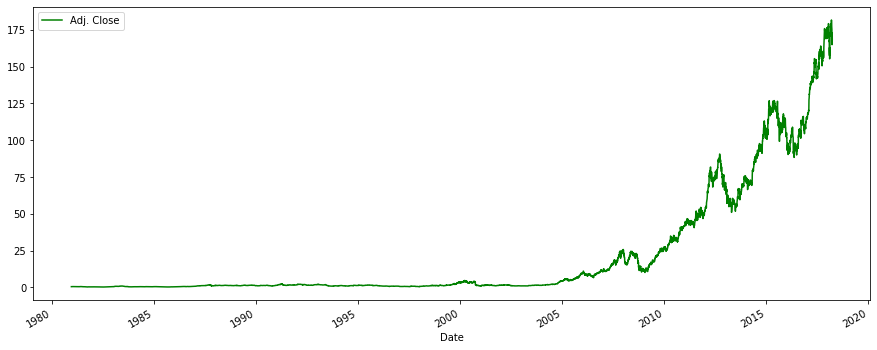

In [8]:
df['Adj. Close'].plot(figsize=(15,6), color='g')
plt.legend(loc='upper left')
plt.show()

In [14]:
forecast = 30
df['Prediction'] = df[['Adj. Close']].shift(-forecast)

X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast] 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)

confidence = clf.score(X_test, y_test)


forecast_predicted = clf.predict(X_forecast)
print(forecast_predicted)

[168.20410766 171.30310306 177.05107473 176.4783231  175.88511606
 175.08735487 176.65219413 179.67448173 183.16724387 182.57403683
 182.29788872 179.10684395 180.34439657 180.96828674 180.81487112
 179.13752708 181.09101923 184.20024233 185.97986346 184.19001463
 182.62517537 182.83995723 182.19561165 179.41367518 179.35230894
 175.29190902 172.81168993 168.81777012 176.82606516 172.2951907 ]


(17282.0, 17648.0)

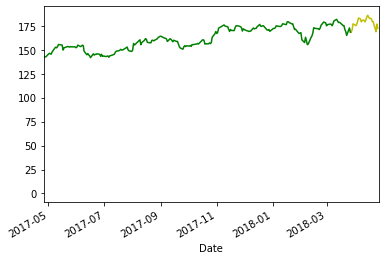

In [22]:
dates = pd.date_range(start="2018-03-28", end="2018-04-26")
plt.plot(dates,forecast_predicted, color='y')
df['Adj. Close'].plot(color='g')
plt.xlim(xmin=datetime.date(2017,4,26),xmax=datetime.date(2018,4,27))